BMI  란...  몸무게 / 키^2

키와 몸무게를 랜덤하게 정해서 BMI 에 따른 비만 정도를 분류한 결과를 레이블로 훈려 데이터를 만들어서 csv 파일로 저장한다.

In [3]:
import random

def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"


fp = open('bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\r\n')

cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write('{0},{1},{2}\r\n'.format(h,w,label))
fp.close()
print('ok',cnt)

    

ok {'thin': 6349, 'normal': 5848, 'fat': 7803}


bmi.csv 파일로부터 키, 몸무게, 레이블 정보를읽어서 SVM 으로 분류시킨다.ㅡ

In [7]:
from sklearn import svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd



In [10]:
tbl = pd.read_csv('bmi.csv')

label = tbl['label']

scaler = StandardScaler()

tbl[['weight','height']] = scaler.fit_transform(tbl[['weight','height']])

w = tbl['weight']
h = tbl['height']

print(type(w))

wh = pd.concat([w,h], axis=1)

print(type(wh))

tbl.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,height,weight,label
0,0.514880,0.559832,normal
1,-0.555668,0.409226,fat
2,-0.298736,-1.096832,thin
3,1.114387,-0.419106,thin
4,0.086661,-0.117894,normal


In [12]:
data_train, data_test, label_train, label_test = train_test_split(wh, label, test_size=0.3)

In [13]:
clf = svm.SVC()
clf.fit(data_train, label_train)

predict = clf.predict(data_test)

ac_score = metrics.accuracy_score(label_test, predict)
cl_report= metrics.classification_report(label_test, predict)

print('정답률:', ac_score)
print("리포트=")
print(cl_report)

정답률: 0.995333333333
리포트=
             precision    recall  f1-score   support

        fat       1.00      1.00      1.00      2337
     normal       0.99      1.00      0.99      1721
       thin       1.00      0.99      1.00      1942

avg / total       1.00      1.00      1.00      6000



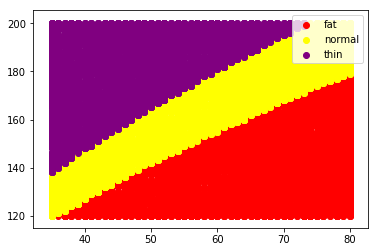

In [16]:
tbl = pd.read_csv("bmi.csv", index_col=2)
# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 
plt.savefig("bmi-test.png")
plt.show()